In [247]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as sk
import math

from sklearn.linear_model import LinearRegression #linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split 

# 1. Introduction

For this assignment, we are going to explore data from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

# 2. Data Cleaning

In [248]:
# READ DF
df1 = pd.read_csv("steps.csv", sep=";") # reading csv file and importing in right format using 'sep'
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
# READ DF
df2 = pd.read_csv("survey.csv")
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [250]:
# MERGING DATA SETS
df = pd.merge(df1, df2, on = "id") # merging the files on the shared "id" column
df.head(20)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,NaN,NaN,Lille,Male,35-44,1,1,Vocational,170.0,63.0
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2442.0,NaN,Lille,Female,35-44,4,4,Vocational,172.0,69.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,NaN,NaN,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0


In [251]:
df['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
128.0     1
116.0     1
102.0     1
101.0     1
105.0     1
Name: weight, Length: 72, dtype: int64

## Impossible values

##### The plot shows that there are a few outliers that aren't possible. There is person in the data set that weighs around 700 kilograms, that isn't possible. I am going to remove all the values above 200 kilograms and under 25 kilograms, to create a more realistic data set. 

/Users/Annabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


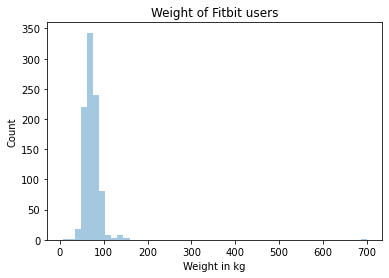

In [252]:
# Finding impossible values by visualizing the data
sns.distplot(df['weight'].dropna(), kde=False) # dropping NaN values to plot
plt.title('Weight of Fitbit users')
plt.xlabel('Weight in kg')
plt.ylabel('Count')
plt.show()

## Removing impossible values

In [253]:
# Removing weight above 200 and under 25 (replacing it with NaN)
def above_200(x):
    if(x > 200): 
        return float('NaN')
    else: 
        return x

df['weight'] = df['weight'].apply(above_200)



def under_25(x):
    if(x < 25): 
        return float('NaN')
    else: 
        return x

    
df['weight'] = df['weight'].apply(under_25)



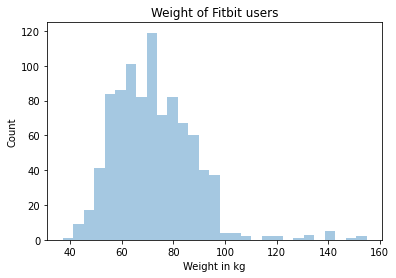

In [254]:
# Checking if impossible values are gone
sns.distplot(df['weight'].dropna(), kde=False) # dropping NaN values
plt.title('Weight of Fitbit users')
plt.xlabel('Weight in kg')
plt.ylabel('Count')
plt.show()

## Mean of steps

In [255]:
# Mean steps per participant, selecting the index and the steps taken, starting at 20-6-2013 till 13-5-2014. 
df["mean_steps"]= df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1)

In [256]:
df["mean_steps"].head() 

0    10205.521212
1     5687.423313
2     8301.729730
3     3633.200000
4     5312.129630
Name: mean_steps, dtype: float64

# 3. Feauture Engineering

##### Caculating BMI formula (example):
65 kilo / (1,70 x 1,70 meter) = 22,5.

## Calculating BMI

In [257]:
weight = df["weight"]
height = df["height"]

def BMI_calculator(bmi):
    bmi = weight/((height/100)*(height/100))
    return bmi

df["BMI"] = BMI_calculator(df)
df["BMI"].head()

0    30.930438
1    23.765432
2    25.617284
3    25.249337
4    21.872423
Name: BMI, dtype: float64

# 4. Exploratory Data Analysis 

## Distribution Plot

##### The graph shows that there are a few outliers, it also shows that the steps between 10.000 and 12.500 are the most average steps taken by the participants.  


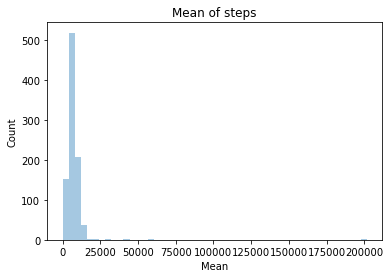

In [258]:
# visualize the count of the Mean steps
sns.distplot(df['mean_steps'], kde=False) 
plt.title('Mean of steps')
plt.xlabel('Mean')
plt.ylabel('Count')
plt.show()


## Box Plot

##### We can see that the outliers are around 30.000, 50.000, 65.000 and 200.000 steps. The most average steps are between 0 and 12.500 steps. 

/Users/Annabelle/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


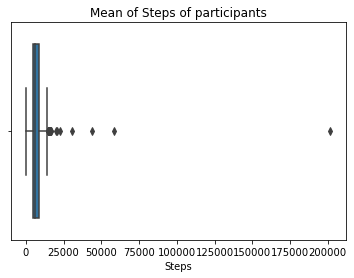

In [259]:
sns.boxplot(df['mean_steps'])
plt.title('Mean of Steps of participants')
plt.xlabel('Steps')
plt.show()


## Histogram

##### The graph tends to be a little right skewed. But the overall curve looks normal. 

Text(0, 0.5, 'Participants Count')

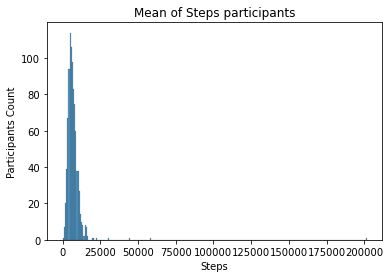

In [260]:
sns.histplot(data=df, x="mean_steps")
plt.title('Mean of Steps participants')
plt.xlabel('Steps')
plt.ylabel('Participants Count')


## Violin plot 

##### This Violin Plot shows us that there are more Male participants then Female. 

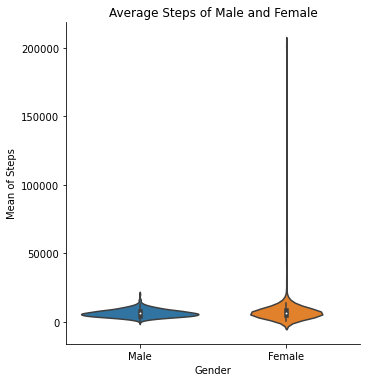

In [300]:
sns.catplot(x="gender", y="mean_steps", kind="violin", data=df)
#sns.swarmplot(x="gender", y="mean", size=3, color="k", data=df)
plt.title('Average Steps of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Mean of Steps')
plt.show()



## Density Plot

##### We can see from this graph that people from the ages 25-34 take the most steps on average. People from the ages 65+ take the least steps on average. 

Text(0.5, 6.79999999999999, 'Mean of Steps')

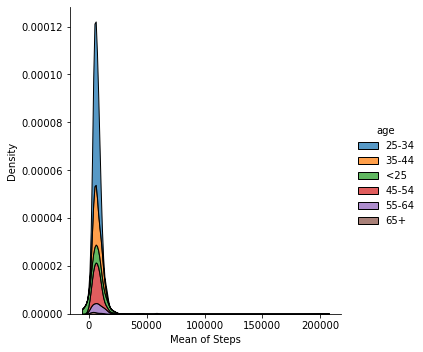

In [298]:
sns.displot(df, x="mean_steps", hue="age", kind="kde", multiple="stack")
plt.xlabel('Mean of Steps')


## Distribution Plot

##### We can see that Males take more steps on average and we see that the outliers are Females (between 25.000 - 75.000 and and outlier around 200.000)

Text(0.5, 6.79999999999999, 'Mean of Steps')

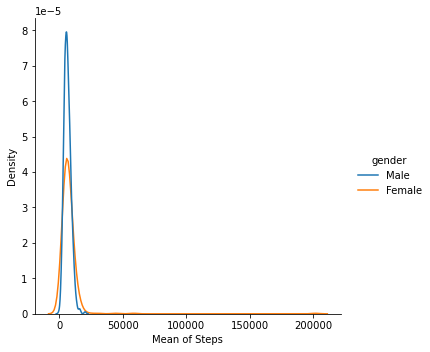

In [297]:
sns.displot(df, x="mean_steps", hue="gender", kind="kde")
plt.xlabel('Mean of Steps')


## Empirical cumulative distributions

##### We can see that there are outliers from the city Lille, we can't see what those outliers are, so maybe not the nicest way to visualize this data. 

Text(0.5, 6.79999999999999, 'Mean of Steps')

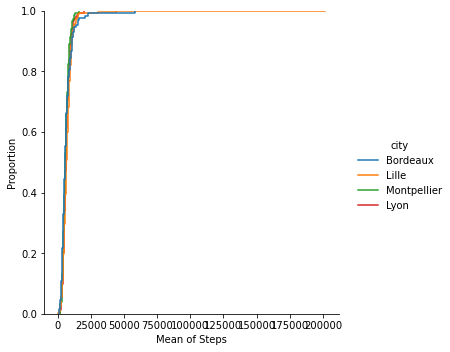

In [296]:
sns.displot(df, x="mean_steps", hue="city", kind="ecdf")
plt.xlabel('Mean of Steps')


## Bivariate Distribution Plot

##### The graph shows that the outliers are participants fromt the city Lille. We also see an outlier from Bordeaux. We can see from the dark colors that a lot of people from Lille take an average of steps between 0 en 20000. 


Text(0.5, 6.79999999999999, 'Mean of steps')

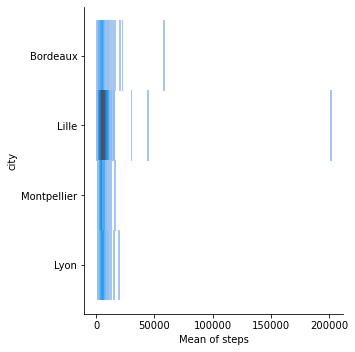

In [295]:
sns.displot(df, x="mean_steps", y="city")
plt.xlabel('Mean of steps')


##### We see that most people have a BMI between 20 and 30, we can see that from the darker blue color in the graph. The average steps of these people is something between 0 and 2000 steps. 

Text(-15.450000000000003, 0.5, 'Mean of the steps')

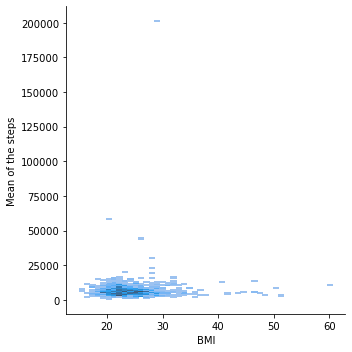

In [294]:
sns.displot(df, x="BMI", y="mean_steps")
plt.xlabel('BMI')
plt.ylabel('Mean of the steps')

## Scatterplot Matrix of numeric variables

##### We can see form the scatterplot that there are positive correlations between height and weight, because of the . There are also positive correlations between BMI and weight. The mean_steps and hh_size distributions look a little right-skewed. There is a little tail on the right. 

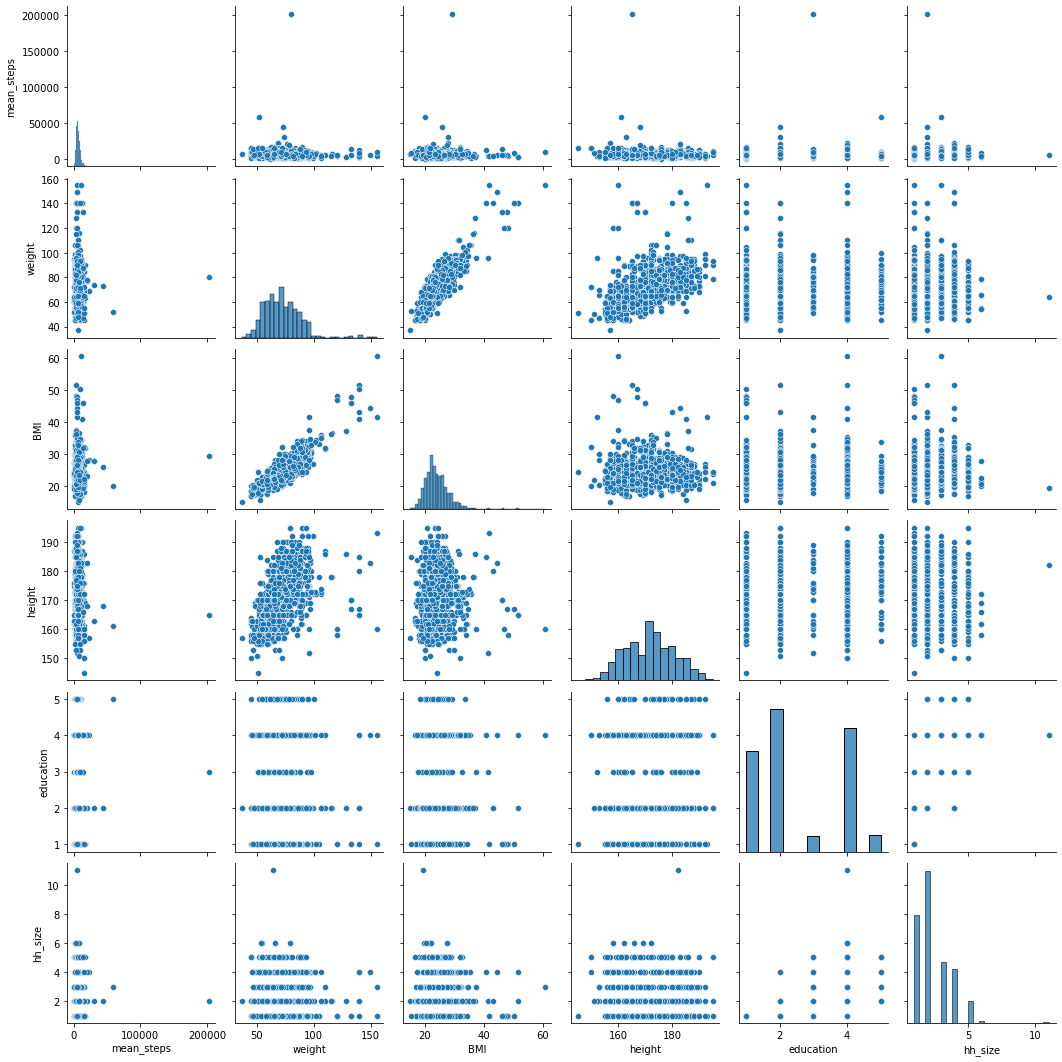

In [267]:
df_subset = df[["mean_steps", "weight", "BMI", "height", "education", "hh_size", "age"]]
sns.pairplot(df_subset)



## Calculating Correlation 

In [268]:
corr = df[['mean_steps', 'weight', 'BMI', 'height', 'education', 'hh_size', 'age']].corr()
print(corr)

            mean_steps    weight       BMI    height  education   hh_size
mean_steps    1.000000 -0.019848  0.017842 -0.069667   0.031109  0.010058
weight       -0.019848  1.000000  0.867004  0.510058   0.009232  0.006322
BMI           0.017842  0.867004  1.000000  0.023608   0.028782  0.035330
height       -0.069667  0.510058  0.023608  1.000000  -0.046343 -0.059704
education     0.031109  0.009232  0.028782 -0.046343   1.000000  0.825585
hh_size       0.010058  0.006322  0.035330 -0.059704   0.825585  1.000000


## Correlation Matrix Heatmap

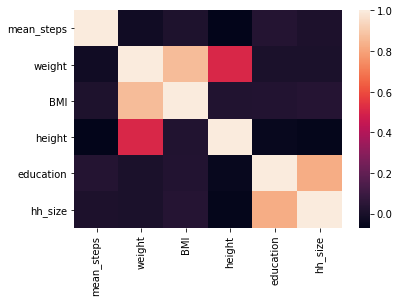

In [269]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()



# 5. Predictive Model

#### comment

In [270]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,BMI
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,NaN,4571.0,10471.0,5899.0,15295.0,9178.0,9348.0,12229.0,13767.0,...,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6282.131868,21.671258
925,926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4799.880000,24.414062
926,927,NaN,NaN,NaN,1623.0,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,10030.326829,21.672110
927,928,NaN,NaN,14411.0,14364.0,26629.0,13092.0,9266.0,14949.0,43238.0,...,Lille,Female,55-64,1,1,High school,172.0,65.0,15679.679012,21.971336


The dataframes contain NaN's. Because of that I cant use the Linear Regression Model, I have to clean up all the NaN values. 

In [271]:
df[df["mean_steps"].isnull()]
df = df.drop([17])
df = df.drop([307])
df = df.drop([553])
df = df.drop([565])



### Explain Linear Regression

Linear Regression is the relation between a independed and depended variable(s), shown by a straight line. 

Formula: y = b0 +b1 x + e

y = depended var

x = independed var

e = erorr/residual (what is left over, or can't explain)

b0 = intercept

b1 = slope

### Dummy variables

In [272]:
dummy_df = pd.get_dummies(df[["gender","education", "city", "age"]])

In [273]:
dummy_df

,education,gender_Female,gender_Male,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,4,0,1,1,0,0,0,1,0,0,0,0,0
1,3,0,1,0,1,0,0,0,1,0,0,0,0
2,2,0,1,0,0,0,1,1,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0,1
4,4,1,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,4,1,0,0,1,0,0,0,0,1,0,0,0
925,5,0,1,0,1,0,0,0,0,0,0,0,1
926,2,0,1,0,0,0,1,0,1,0,0,0,0
927,1,1,0,0,1,0,0,0,0,0,1,0,0


### Linear Regression Model

##### Test and Train Data sets
y = independed var (mean steps)

x = dependent var (gender, age etc)

In [278]:
from sklearn.model_selection import train_test_split

x= dummy_df[["gender_Female", "age_<25", "city_Lille"]]
y= df["mean_steps"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [279]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() #create a new (empty model)
lm = lm.fit(x_train, y_train) #fit the model WITH THE TRAIN DATA ONLY

In [280]:
b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 5719.37 + 1254.63X


y = mean steps
x = females, age under 25 and from Lille

A female from the city Lille, younger than 25:
Mean steps starts at 5719 steps 

# 6. Evaluation

#### Predictive power of the model (R2, RMSE)


In [281]:
y_test_p = lm.predict(x_test) #Generate the predictions and store them in y_test_p. USE ONLY THE TEST DATA HERE

In [285]:
r2_score(y_test, y_test_p) #this gives the model fit (R2) for the Y and predicted Y (R2)

-0.0434851580157658

I think I made a mistake somewhere because the R2 is a negative number, I read that a negative outcome is possible but it means that the model doesnt follow the trend of the data.  

In [287]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y (R^2)

3236.5165556888364

The typical prediction is off by 3236 steps(?). 

#### Investigate the residuals

In [290]:
df['steps_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(50)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,gender,age,hh_size,education,education_1,height,weight,mean_steps,BMI,steps_p
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438,5719.369151
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432,6900.961401
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284,5719.369151
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337,6975.123143
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423,6973.998638
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Male,35-44,1,1,Vocational,170.0,63.0,11908.509804,21.799308,6900.961401
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,25-34,2,2,Master or doctorate,175.0,75.0,4715.400000,24.489796,5719.369151
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,25-34,3,4,Master or doctorate,165.0,88.0,3594.051724,32.323232,6973.998638
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,35-44,4,4,Vocational,172.0,69.0,8626.707965,23.323418,8155.590889
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,Female,25-34,2,2,Master or doctorate,165.0,93.0,3787.043478,34.159780,8155.590889


#### Adding residuals of mean steps

In [291]:
df["resid"] = df["mean_steps"] - df["steps_p"]
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,age,hh_size,education,education_1,height,weight,mean_steps,BMI,steps_p,resid
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438,5719.369151,4486.152061
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432,6900.961401,-1213.538088
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284,5719.369151,2582.360579
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337,6975.123143,-3341.923143
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423,6973.998638,-1661.869008


In [293]:
lm2 = LinearRegression() #create a new (empty model)
lm2.fit(x, y) #fit the model with all the data
y_p = lm.predict(x)
r2_score(df["mean_steps"], df["steps_p"]) 

0.009834233174188522

Typical predicition is off by 0.0098 steps(?). 

# 7. Conclusion

I think I made a few mistakes on the way because of my results. I have a very hard time understanding the formulas and math equations. I missed the last class and I think because of that I miss an important part of the explanation. I tried to understand it by reading the presentation and watching the lecture vid of last year but I have still a hard time understanding the material. I need to spend some more time on understanding the logic of the equations and theory behind the models. 